In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('data.csv')

/var/folders/2f/2mkjh7vd3tx1b2gp9d91lwtr0000gn/T/ipykernel_47877/1993863983.py:4: DtypeWarning: Columns (7,12,14,15,16,20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data.csv')


## Preview Data

In [2]:
data.head(5)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,0,1.0,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,376.0,43.0,NaN,S1,743 EAST 6TH STREET,...,1.0,1.0,2.0,2090.0,3680.0,1940.0,1.0,S1,3200000.0,2019-07-24
1,1,1.0,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,390.0,61.0,NaN,A4,189 EAST 7TH STREET,...,1.0,0.0,1.0,987.0,2183.0,1860.0,1.0,A4,0.0,2019-09-25
2,2,1.0,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,404.0,1.0,NaN,B9,166 AVENUE A,...,2.0,0.0,2.0,1510.0,4520.0,1900.0,1.0,B9,0.0,2019-07-22
3,3,1.0,ALPHABET CITY,03 THREE FAMILY DWELLINGS,1,377.0,56.0,NaN,C0,263 EAST 7TH STREET,...,3.0,0.0,3.0,2430.0,3600.0,1899.0,1.0,C0,6300000.0,2019-04-30
4,4,1.0,ALPHABET CITY,03 THREE FAMILY DWELLINGS,1,393.0,9.0,NaN,C0,604 EAST 11TH STREET,...,3.0,0.0,3.0,2375.0,5110.0,1939.0,1.0,C0,0.0,2019-10-24


In [3]:
print(data.info())
print(data.convert_dtypes().dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1845520 entries, 0 to 1845519
Data columns (total 22 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   Unnamed: 0                      int64  
 1   BOROUGH                         float64
 2   NEIGHBORHOOD                    object 
 3   BUILDING CLASS CATEGORY         object 
 4   TAX CLASS AT PRESENT            object 
 5   BLOCK                           float64
 6   LOT                             float64
 7   EASE-MENT                       object 
 8   BUILDING CLASS AT PRESENT       object 
 9   ADDRESS                         object 
 10  APARTMENT NUMBER                object 
 11  ZIP CODE                        float64
 12  RESIDENTIAL UNITS               object 
 13  COMMERCIAL UNITS                float64
 14  TOTAL UNITS                     object 
 15  LAND SQUARE FEET                object 
 16  GROSS SQUARE FEET               object 
 17  YEAR BUILT                 

## Clean Data

In [4]:
## Clean Data

# Make sure all Sales Prices are floats
for i, price in enumerate(data["SALE PRICE"]):
    if type(data["SALE PRICE"][i]) == str:
        data["SALE PRICE"].loc[i] = float(data["SALE PRICE"][i].replace(",",""))
data["SALE PRICE"] = data["SALE PRICE"].astype(float)

# drop 0 Sales Price
zero_sales = len(data[data['SALE PRICE'] == 0]) + data['SALE PRICE'].isna().sum()
registers_orig = data.shape[0]
print("Total number of registers:", (registers_orig))
print("Total number of NULL registers:", (zero_sales))
print(" % of null registers: {:.2f}".format((zero_sales/registers_orig)*100))
clean_data = data[data['SALE PRICE'] != 0].dropna(axis=0, how='any', subset='SALE PRICE')

# drop NaN Sales Price 
total_reg = clean_data.shape[0]
print("Total number of VALID registers:", total_reg)
print(" % of valid registers: {:.2f}".format((total_reg/registers_orig)*100))
clean_data.head()

/var/folders/2f/2mkjh7vd3tx1b2gp9d91lwtr0000gn/T/ipykernel_47877/348809896.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["SALE PRICE"].loc[i] = float(data["SALE PRICE"][i].replace(",",""))


Total number of registers: 1845520
Total number of NULL registers: 554203
 % of null registers: 30.03
Total number of VALID registers: 1291317
 % of valid registers: 69.97


,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,0,1.0,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,376.0,43.0,NaN,S1,743 EAST 6TH STREET,...,1.0,1.0,2.0,2090.0,3680.0,1940.0,1.0,S1,3200000.0,2019-07-24
3,3,1.0,ALPHABET CITY,03 THREE FAMILY DWELLINGS,1,377.0,56.0,NaN,C0,263 EAST 7TH STREET,...,3.0,0.0,3.0,2430.0,3600.0,1899.0,1.0,C0,6300000.0,2019-04-30
5,5,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,372.0,23.0,NaN,C1,300 EAST 3RD STREET,...,12.0,0.0,12.0,2393.0,7989.0,2001.0,2.0,C1,1950000.0,2019-08-08
6,6,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,373.0,19.0,NaN,C7,332 EAST 4TH STREET,...,28.0,2.0,30.0,4651.0,17478.0,1920.0,2.0,C7,14000000.0,2019-01-09
8,8,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,376.0,23.0,NaN,C3,"262 EAST 7TH STREET, 4",...,4.0,0.0,4.0,2059.0,4154.0,1900.0,2.0,C3,600000.0,2019-12-12


In [5]:
# Check pricing for registers
reg_under_10 = len(clean_data[(clean_data['SALE PRICE']<10000)])
reg_under_100 = len(clean_data[(clean_data['SALE PRICE']<100000)])

print("Total registers below $10k: {:,}".format(reg_under_10))
print(" % of registers below $10k considering the clean dataset {:.2f}".format(reg_under_10*100/total_reg))
print(" % of registers below $10k considering the original dataset {:.2f}".format(reg_under_10*100/registers_orig))

print("Total registers below $100k: {:,}".format(reg_under_100))
print(" % of registers below $100k considering the clean dataset {:.2f}".format(reg_under_100*100/total_reg))
print(" % of registers below $100k considering the original dataset {:.2f}".format(reg_under_100*100/registers_orig))

Total registers below $10k: 30,902
 % of registers below $10k considering the clean dataset 2.39
 % of registers below $10k considering the original dataset 1.67
Total registers below $100k: 100,900
 % of registers below $100k considering the clean dataset 7.81
 % of registers below $100k considering the original dataset 5.47


In [6]:
# Add BOROUGH_NAME for interpretability
borough_names = ["MANHATTAN", "BRONX", "BROOKLYN", "QUEENS", "STATEN ISLAND"]
borough_name_data = [borough_names[int(i)-1] for i in clean_data["BOROUGH"]]
clean_data.insert(loc=1, column='BOROUGH_NAME', value=borough_name_data)

# Clean NEIGHBORHOOD whitespaces
clean_data["NEIGHBORHOOD"] = clean_data["NEIGHBORHOOD"].str.replace(" ", "")

# Convert SALE DATE column for analysis, add SALE YEAR and MONTH
clean_data["SALE DATE"] = pd.to_datetime(clean_data["SALE DATE"])
clean_data["SALE YEAR"] = clean_data["SALE DATE"].dt.year.values
clean_data["SALE MONTH"] = clean_data["SALE DATE"].dt.month_name().values

In [7]:
clean_data.columns

Index(['Unnamed: 0', 'BOROUGH_NAME', 'BOROUGH', 'NEIGHBORHOOD',
       'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BLOCK', 'LOT',
       'EASE-MENT', 'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER',
       'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE', 'SALE YEAR', 'SALE MONTH'],
      dtype='object')

## Helper Functions

In [8]:
def get_saleprice_stats_groupby(data, column_name):
    mean_price = data.groupby([column_name])["SALE PRICE"].mean()
    median_price = data.groupby([column_name])["SALE PRICE"].median()
    min_price = data.groupby([column_name])["SALE PRICE"].min()
    max_price = data.groupby([column_name])["SALE PRICE"].max()
    return mean_price, median_price, min_price, max_price 

## Analysis

### Sales over 2003-2022

In [9]:
data_by_sales = clean_data.copy()
data_by_sales = data_by_sales.set_index("SALE DATE")
data_by_sales.head(5)

,Unnamed: 0,BOROUGH_NAME,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,...,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE YEAR,SALE MONTH
SALE DATE,,,,,,,,,,,,,,,,,,,,,
2019-07-24,0,MANHATTAN,1.0,ALPHABETCITY,01 ONE FAMILY DWELLINGS,1,376.0,43.0,NaN,S1,...,1.0,2.0,2090.0,3680.0,1940.0,1.0,S1,3200000.0,2019,July
2019-04-30,3,MANHATTAN,1.0,ALPHABETCITY,03 THREE FAMILY DWELLINGS,1,377.0,56.0,NaN,C0,...,0.0,3.0,2430.0,3600.0,1899.0,1.0,C0,6300000.0,2019,April
2019-08-08,5,MANHATTAN,1.0,ALPHABETCITY,07 RENTALS - WALKUP APARTMENTS,2,372.0,23.0,NaN,C1,...,0.0,12.0,2393.0,7989.0,2001.0,2.0,C1,1950000.0,2019,August
2019-01-09,6,MANHATTAN,1.0,ALPHABETCITY,07 RENTALS - WALKUP APARTMENTS,2,373.0,19.0,NaN,C7,...,2.0,30.0,4651.0,17478.0,1920.0,2.0,C7,14000000.0,2019,January
2019-12-12,8,MANHATTAN,1.0,ALPHABETCITY,07 RENTALS - WALKUP APARTMENTS,2A,376.0,23.0,NaN,C3,...,0.0,4.0,2059.0,4154.0,1900.0,2.0,C3,600000.0,2019,December


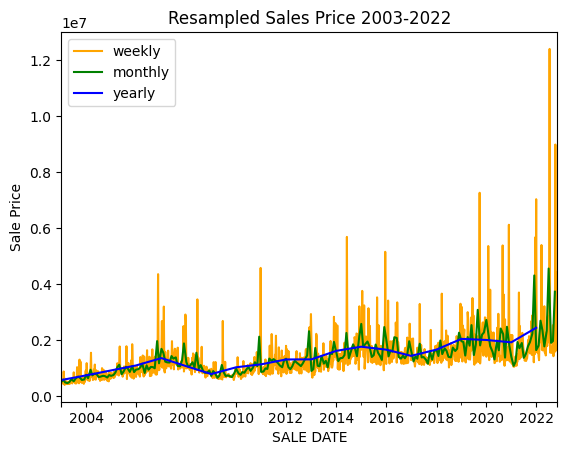

In [10]:
weekly_mean = data_by_sales["SALE PRICE"].resample('W').mean()
monthly_mean = data_by_sales["SALE PRICE"].resample('M').mean()
yearly_mean = data_by_sales["SALE PRICE"].resample('Y').mean()

weekly_mean.plot(label="weekly", color='orange')
monthly_mean.plot(label="monthly", color='green')
yearly_mean.plot(label="yearly", color='blue')
plt.title("Resampled Sales Price 2003-2022")
plt.ylabel("Sale Price")
plt.legend()
plt.show()

#### How Borough Prices have changed overtime

In [11]:
# Get data per borough
print("Number of Boroughs:", len(borough_names))
print("Names of Boroughs:\n", borough_names)

borough_clean_data = {}
for borough in borough_names:
    borough_clean_data[borough] = data_by_sales[data_by_sales["BOROUGH_NAME"] == borough]


Number of Boroughs: 5
Names of Boroughs:
 ['MANHATTAN', 'BRONX', 'BROOKLYN', 'QUEENS', 'STATEN ISLAND']


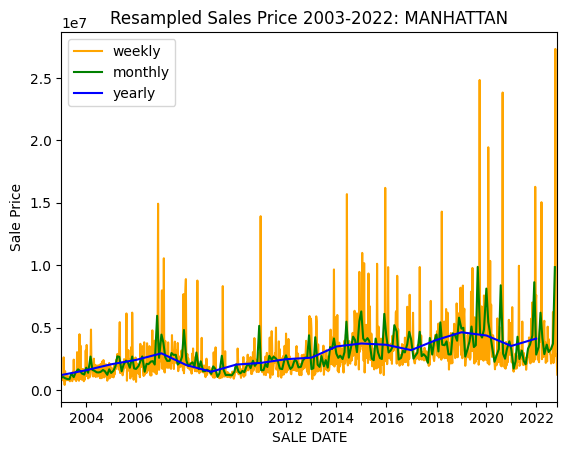

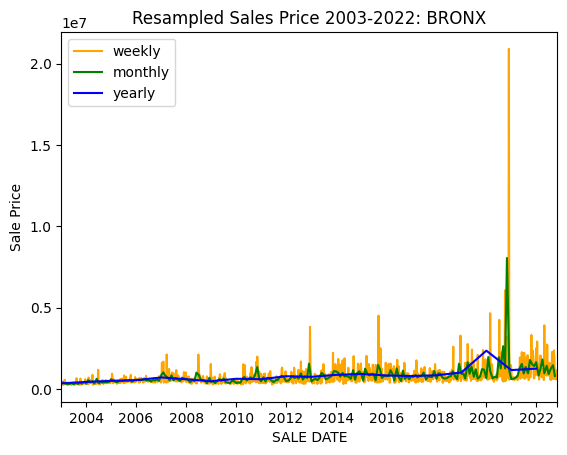

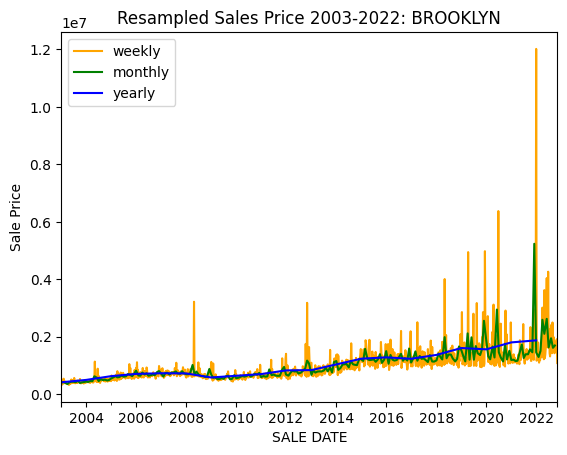

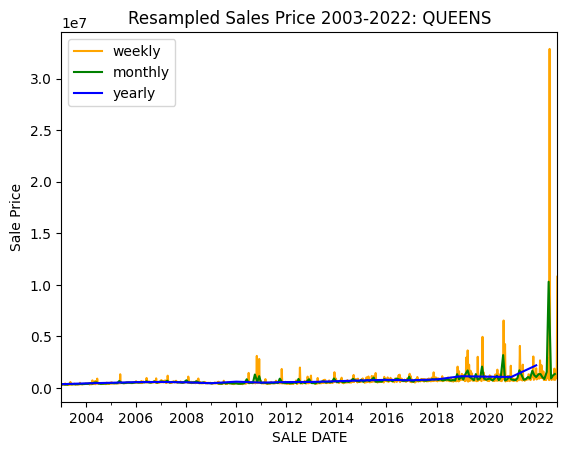

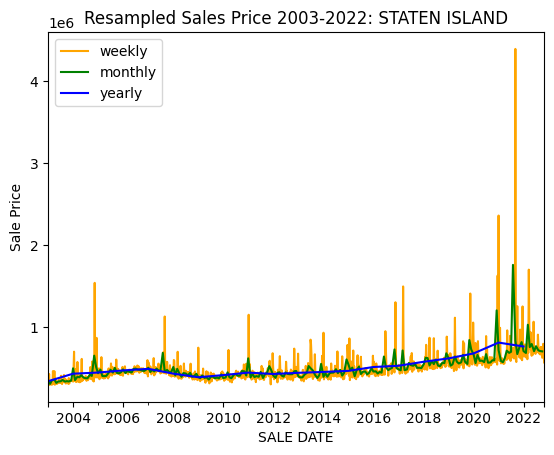

In [12]:
for borough in borough_names:
    borough_data = borough_clean_data[borough]
    weekly_mean = borough_data["SALE PRICE"].resample('W').mean()
    monthly_mean = borough_data["SALE PRICE"].resample('M').mean()
    yearly_mean = borough_data["SALE PRICE"].resample('Y').mean()

    weekly_mean.plot(label="weekly", color='orange')
    monthly_mean.plot(label="monthly", color='green')
    yearly_mean.plot(label="yearly", color='blue')
    plt.title("Resampled Sales Price 2003-2022: {}".format(borough))
    plt.ylabel("Sale Price")
    plt.legend()
    plt.show()

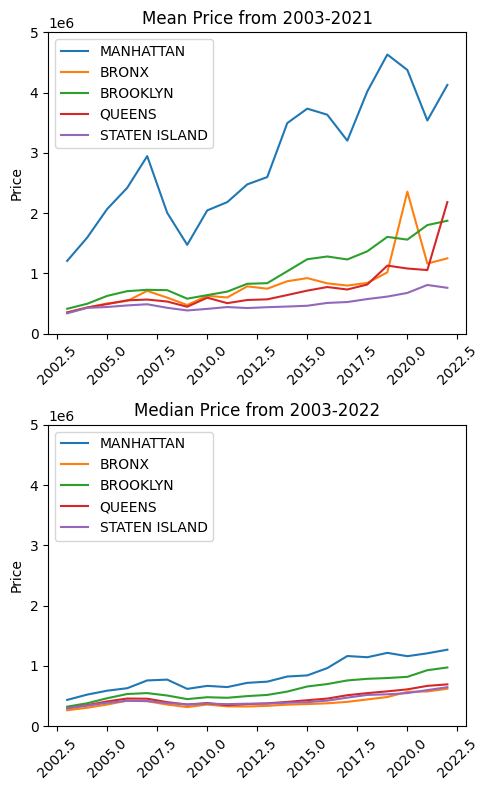

In [13]:
# Get mean and median data per borough, grouped by sale year
borough_mean_data = {}
borough_median_data = {}
for borough in borough_names:
    mean_price, median_price, _, _ = get_saleprice_stats_groupby(borough_clean_data[borough], "SALE YEAR")
    borough_mean_data[borough] = mean_price
    borough_median_data[borough] = median_price

# Plot Mean and Median sale prices over the years, per borough
figsize = (5,8)
fig, ax = plt.subplots(2, 1, figsize=figsize, tight_layout = True)
min_ylim = 0
max_ylim = 5e6

# Mean Prices for Manhattan
for borough in borough_names:
    ax[0].plot(borough_mean_data[borough], label=borough)
ax[0].set_title("Mean Price from 2003-2021")
ax[0].set_ylabel("Price")
ax[0].set_ylim([min_ylim, max_ylim])
plt.sca(ax[0])
plt.xticks(rotation=45)
plt.legend(loc='upper left')

# Median Prices for Manhattan
for borough in borough_names:
    ax[1].plot(borough_median_data[borough], label=borough)
ax[1].set_title("Median Price from 2003-2022")
ax[1].set_ylabel("Price")
ax[1].set_ylim([min_ylim, max_ylim])
plt.sca(ax[1])
plt.xticks(rotation=45)
plt.legend(loc='upper left')

plt.show()

#### How Neighborhood Prices have changed overtime

### Looking Closer at Sales prices based on location

##### By Borough

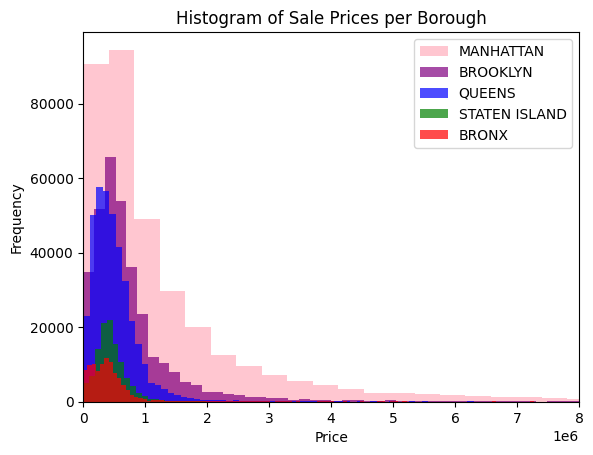

In [14]:
# Plot histogram of sale prices per borough
plt.hist(borough_clean_data["MANHATTAN"]["SALE PRICE"], bins=10000, label="MANHATTAN", alpha=0.9, color="pink")
plt.hist(borough_clean_data["BROOKLYN"]["SALE PRICE"], bins=5000, label="BROOKLYN", alpha=0.7, color="purple")
plt.hist(borough_clean_data["QUEENS"]["SALE PRICE"], bins=5000, label="QUEENS", alpha=0.7, color="blue")
plt.hist(borough_clean_data["STATEN ISLAND"]["SALE PRICE"], bins=2000, label="STATEN ISLAND", alpha=0.7, color="green")
plt.hist(borough_clean_data["BRONX"]["SALE PRICE"], bins=2000, label="BRONX", alpha=0.7, color="red")
plt.xlim([0,0.8e7])
plt.title("Histogram of Sale Prices per Borough")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.legend()
plt.show()

Mean, Median, Min, Max - Per Borough


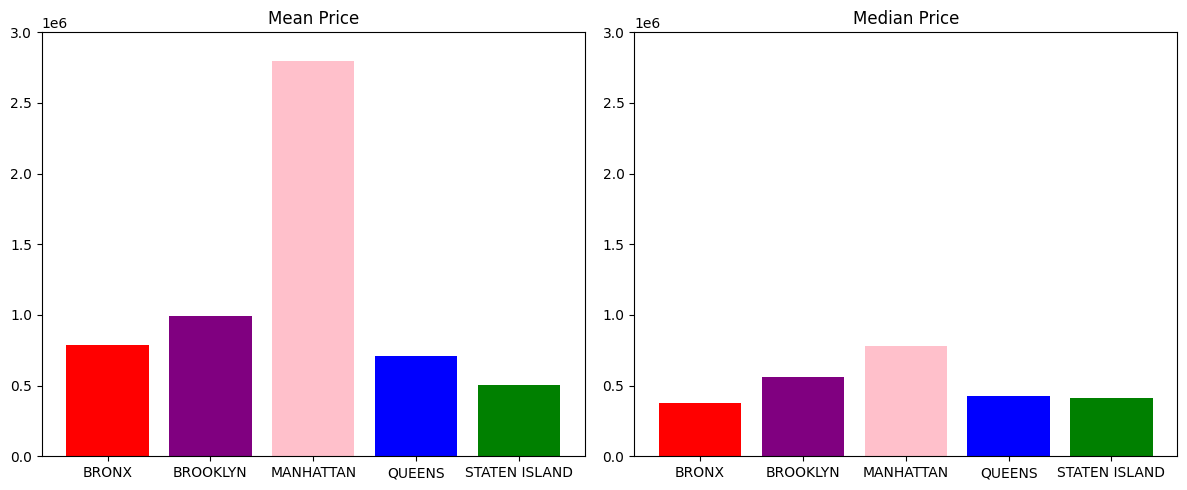

Minimum Prices
BOROUGH_NAME
BRONX            1.0
BROOKLYN         1.0
MANHATTAN        1.0
QUEENS           1.0
STATEN ISLAND    1.0
Name: SALE PRICE, dtype: float64

Maximum Prices
BOROUGH_NAME
BRONX            1.372983e+08
BROOKLYN         8.696129e+08
MANHATTAN        4.111112e+09
QUEENS           5.249157e+08
STATEN ISLAND    1.894423e+08
Name: SALE PRICE, dtype: float64


In [15]:
# Plot bar graphs of sale prices per borough
print("Mean, Median, Min, Max - Per Borough")
print("="*100)
mean_price_b, median_price_b, min_price_b, max_price_b = get_saleprice_stats_groupby(clean_data, "BOROUGH_NAME")

fig, ax = plt.subplots(1,2, figsize=(12, 5), tight_layout = True)
min_ylim = 0
max_ylim = 3e6
# Mean Prices for Boroughs
ax[0].bar(mean_price_b.index, mean_price_b.values, color=["red", "purple", "pink", "blue", "green"])
ax[0].set_title("Mean Price")
ax[0].set_ylim([min_ylim, max_ylim])
# Median Prices for Boroughs
ax[1].bar(median_price_b.index, median_price_b.values, color=["red", "purple", "pink", "blue", "green"])
ax[1].set_title("Median Price")
ax[1].set_ylim([min_ylim, max_ylim])
plt.show()
# Minimum Prices for Boroughs
print("Minimum Prices")
print(min_price_b)
print()
# Maximum Prices for Boroughs
print("Maximum Prices")
print(max_price_b)



##### By Neigherborhood

In [16]:
print("Number of Neighborhoods: ", len(clean_data["NEIGHBORHOOD"].unique()))
print("Names of Neighborhoods:\n", sorted(clean_data["NEIGHBORHOOD"].unique()))

Number of Neighborhoods:  264
Names of Neighborhoods:
 ['3004', 'AIRPORTJFK', 'AIRPORTLAGUARDIA', 'ALPHABETCITY', 'ANNADALE', 'ARDENHEIGHTS', 'ARROCHAR', 'ARROCHAR-SHOREACRES', 'ARVERNE', 'ASTORIA', 'BATHBEACH', 'BATHGATE', 'BAYCHESTER', 'BAYRIDGE', 'BAYSIDE', 'BEDFORDPARK/NORWOOD', 'BEDFORDSTUYVESANT', 'BEECHHURST', 'BELLEHARBOR', 'BELLEROSE', 'BELMONT', 'BENSONHURST', 'BERGENBEACH', 'BLOOMFIELD', 'BOERUMHILL', 'BOROUGHPARK', 'BREEZYPOINT', 'BRIARWOOD', 'BRIGHTONBEACH', 'BROADCHANNEL', 'BRONX-UNKNOWN', 'BRONXDALE', 'BRONXPARK', 'BROOKLYN-UNKNOWN', 'BROOKLYNHEIGHTS', 'BROWNSVILLE', 'BULLSHEAD', 'BUSHTERMINAL', 'BUSHWICK', 'CAMBRIAHEIGHTS', 'CANARSIE', 'CARROLLGARDENS', 'CASTLEHILL/UNIONPORT', 'CASTLETONCORNERS', 'CHELSEA', 'CHINATOWN', 'CITYISLAND', 'CITYISLAND-PELHAMSTRIP', 'CIVICCENTER', 'CLINTON', 'CLINTONHILL', 'CLOVELAKES', 'CO-OPCITY', 'COBBLEHILL', 'COBBLEHILL-WEST', 'COLLEGEPOINT', 'CONCORD', 'CONCORD-FOXHILLS', 'CONEYISLAND', 'CORONA', 'COUNTRYCLUB', 'CROTONAPARK', 'CROWNHEIGH

Mean, Median - Per Neighborhood


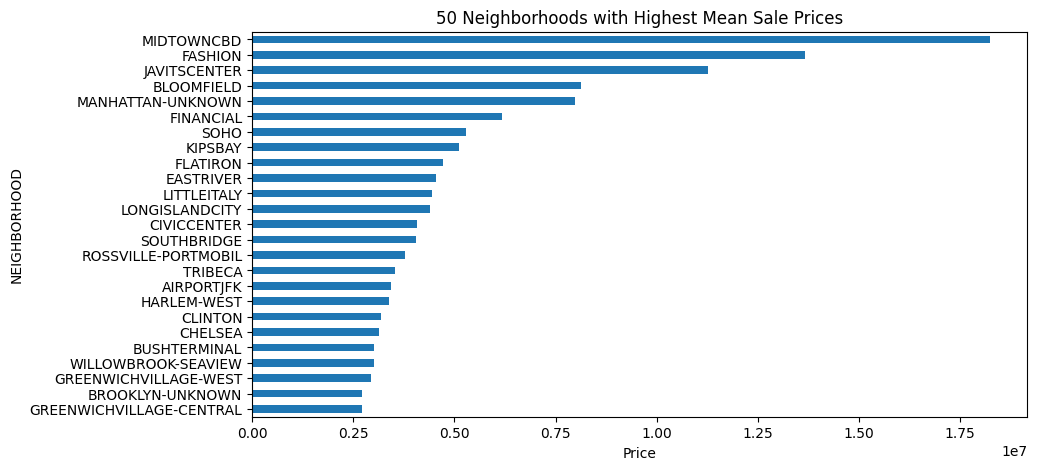

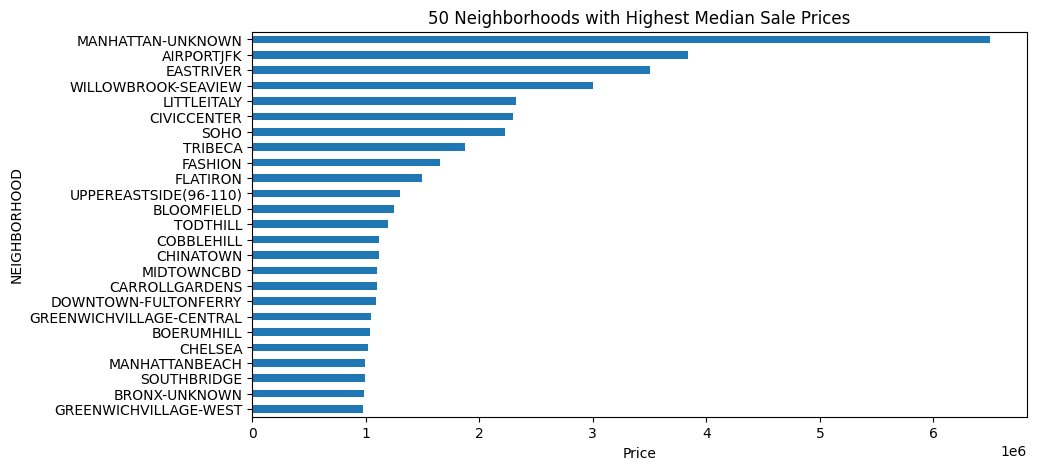

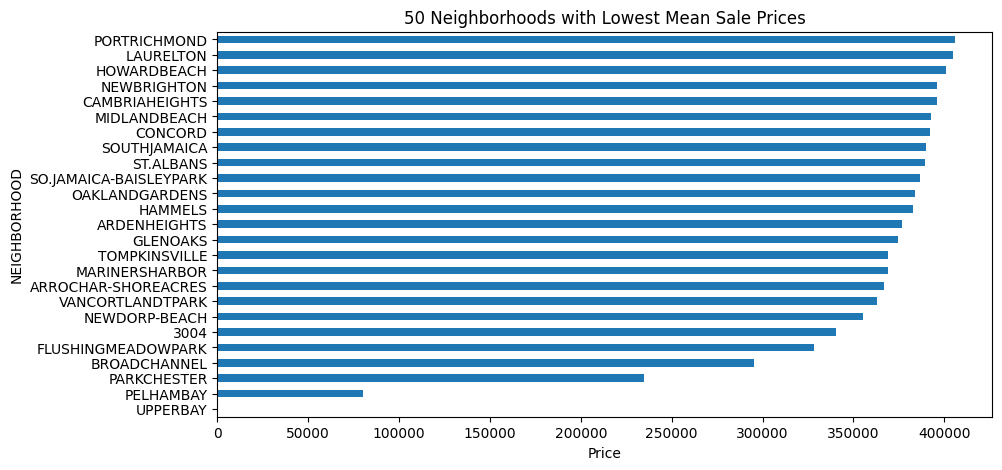

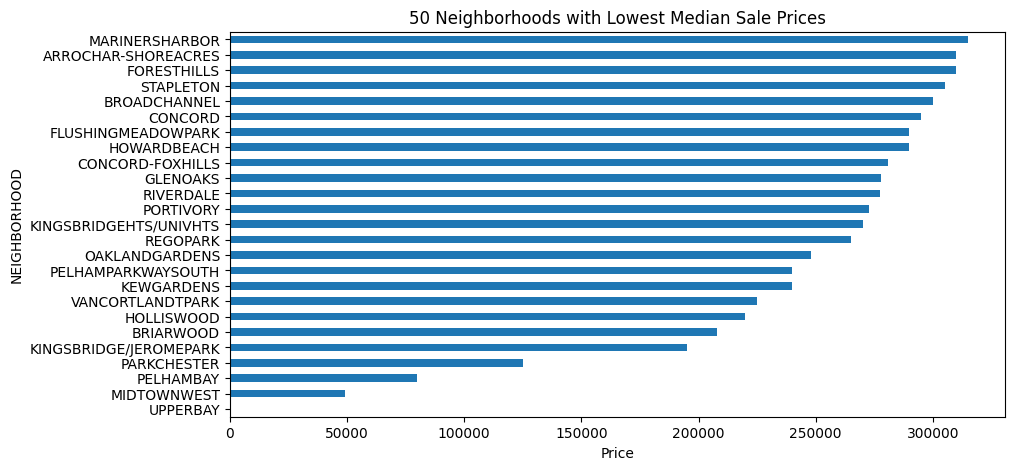

In [17]:
# Plot bar graphs of sale prices per for most/least expensive neighborhoods
print("Mean, Median - Per Neighborhood")
print("="*100)
mean_price_n, median_price_n, _, _ = get_saleprice_stats_groupby(clean_data, "NEIGHBORHOOD")
mean_price_n = mean_price_n.sort_values(ascending=True)
median_price_n = median_price_n.sort_values(ascending=True)
n = 25
figsize = (10,5)

# Highest Mean Sales Prices
fig = plt.figure(figsize=figsize)
mean_price_n[-n:].plot(kind='barh')
plt.title("50 Neighborhoods with Highest Mean Sale Prices")
plt.xlabel("Price")
plt.show()

# Highest Median Sales Prices
fig = plt.figure(figsize=figsize)
median_price_n[-n:].plot(kind='barh')
plt.title("50 Neighborhoods with Highest Median Sale Prices")
plt.xlabel("Price")
plt.show()

# Lowest Mean Sales Prices
fig = plt.figure(figsize=figsize)
mean_price_n[:n].plot(kind='barh')
plt.title("50 Neighborhoods with Lowest Mean Sale Prices")
plt.xlabel("Price")
plt.show()

# Lowest Median Sales Prices
fig = plt.figure(figsize=figsize)
median_price_n[:n].plot(kind='barh')
plt.title("50 Neighborhoods with Lowest Median Sale Prices")
plt.xlabel("Price")
plt.show()
